# Лабораторная 1<br>
Екатерина Васильева М32081

**Задание 1**
Пусть выборка $X_1, \ldots, X_n$ соответствует классу распределений $F_\theta$, $\theta \in E \subset \mathbb{R}$. При каком минимальном объеме выборки $n$ равномерно для $\theta \in E$ выборочное среднее отличается от математического ожидания $\mu_\theta$ не более чем на $\varepsilon > 0$ с вероятностью, не меньшей $1-\delta$, $\delta \in (0, 1)$? Сгенерировать 500 выборок найденного объема при $\varepsilon = 0.01$ и $\delta = 0.05$ из указанного распределения $F_\theta$ при конкретном параметре $\theta$ и посчитать, сколько раз выборочное среднее отличается от математического ожидания $\mu_\theta$ более чем на $\varepsilon$.

***Условие***<br>
$min(n): P(|\hat X - \mu| \leq \varepsilon) \geq 1 - \delta \nbsp|\nbsp \hat X=\frac{1}{n}\sum^n_{i=1}x_i$<br>
***Теория***<br>
Для пуассоновского распределения: $E(X)=\lambda, D(X)=\lambda$<br>
По ЦПТ: сумма случайно распределённых величин стремится к нормальному распределению с параметрами: $N(\mu,\frac{\sigma^2}{n})$
Приводим функцию к нормальному распределению по ЦПТ:
$\frac{(\hat X - \mu)\sqrt{n}}{\sigma}\to N(0, 1)$
***Решение***<br>
 $P(|\hat X - \mu| \leq \epsilon) = P(\frac{|\hat X - \mu|\sqrt{n}}{\sigma} \leq \frac{\epsilon \sqrt{n}}{\sigma}) =
P(-\frac{\epsilon \sqrt{n}}{\sigma} \leq \frac{|\hat X - \mu|\sqrt{n}}{\sigma} \leq \frac{\epsilon \sqrt{n}}{\sigma}) \approx $
$ \approx \Phi(\frac{\epsilon \sqrt{n}}{\sigma}) - \Phi(-\frac{\epsilon \sqrt{n}}{\sigma}) = 2 \Phi (\frac{\epsilon \sqrt{n}}{\sigma}) - 1$<br>

$ 2 \Phi (\frac{\epsilon \sqrt{n}}{\sigma}) - 1 \ge 1-\delta$<br>
$\Phi (\frac{\epsilon \sqrt{n}}{\sigma}) \ge \frac{2-\delta}{2}$<br>
$\frac{\varepsilon\sqrt{n}}{\sigma} \ge q_{\frac{2-\delta}{2}}$<br>
$n \ge (\frac{\sigma q_{\frac{2-\delta}{2}}}{\varepsilon})^2$<br>

In [86]:
from numpy import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

eps = 0.01
delta = 0.05
n = 500
lam = 2
quantile = st.norm.ppf((2 - delta) / 2)
sigma = sqrt(lam)
minN = int(((sigma*quantile)/eps)**2)
print(minN)

76829


**Генерируем выборки:**

In [87]:
count = 0
for i in range(n):
    X = st.poisson.rvs(mu=lam, size=minN)
    mean = np.mean(X)
    if np.abs(mean - lam) > eps:
        count += 1
print(count)

28


Столько раз из 500 выборочное среднее отличается от мат. ожидания более чем на 0.01

**Задание 2**

В файле cars93.csv представлены данные об автомобилях. Какие типы автомобилей
представлены в датасете? Какой тип наиболее распространен, какой – менее? Рассчитайте выборочное среднее, выборочную дисперсию, выборочную медиану и межквартильный размах мощности для всей совокупности автомобилей и отдельно для каждого типа
автомобиля. Построить график эмпирической функции распределения, гистограмму и
box-plot мощности для всей совокупности и отдельно для каждого типа авто.

**1) Типы автомобилей**

In [88]:
df = pd.read_csv('cars93.csv', delimiter=',')
types = set(df['Type'].values)
print("Типы автомобилей:", ', '.join(types))


Типы автомобилей: Sporty, Van, Large, Compact, Small, Midsize


In [89]:
count = df['Type'].value_counts()
print("Больше всего - ", count.idxmax(), ':', count.max())
print("Меньше всего - ", count.idxmin(), ':', count.min())

Больше всего -  Midsize : 22
Меньше всего -  Van : 9


**2) Рассчет выборочного срееднего, выборочной дисперсии, выборочной медианы, межквартильного размаха мощности**

*а) для всей совокупности автомобилей*

In [90]:
print("Выборочное среднее мощности:", df['Horsepower'].mean())
print("Выборочная дисперсия мощности:", df['Horsepower'].var())
print("Выборочная медиана мощностии:", df['Horsepower'].median())
print("Межквартильный размах мощности:", df['Horsepower'].quantile(0.75) - df['Horsepower'].quantile(0.25))

Выборочное среднее мощности: 143.8279569892473
Выборочная дисперсия мощности: 2743.0787751285648
Выборочная медиана мощностии: 140.0
Межквартильный размах мощности: 67.0


*б) для каждого типа автомобиля*

In [91]:
print("Выборочное среднее мощности:")
print(df.groupby(['Type'])['Horsepower'].mean())
print()
print("Выборочная дисперсия:")
print(df.groupby(['Type'])['Horsepower'].var())
print()
print("Выборочная медиана мощности:")
print(df.groupby(['Type'])['Horsepower'].median())
print()
print("Межквартильный размах мощности:")
print(df.groupby(['Type'])['Horsepower'].quantile(0.75)-df.groupby(['Type'])['Horsepower'].quantile(0.25))

Выборочное среднее мощности:
Type
Compact    131.000000
Large      179.454545
Midsize    173.090909
Small       91.000000
Sporty     160.142857
Van        149.444444
Name: Horsepower, dtype: float64

Выборочная дисперсия:
Type
Compact     518.533333
Large       477.072727
Midsize    2756.086580
Small       447.600000
Sporty     5536.285714
Van         370.277778
Name: Horsepower, dtype: float64

Выборочная медиана мощности:
Type
Compact    132.0
Large      170.0
Midsize    169.0
Small       90.0
Sporty     147.5
Van        151.0
Name: Horsepower, dtype: float64

Межквартильный размах мощности:
Type
Compact    33.25
Large      25.00
Midsize    69.00
Small      21.00
Sporty     72.25
Van        23.00
Name: Horsepower, dtype: float64


**3) Построение графиков эмпирической функции распределения, гистограммы и box-plot мощности

*a)для всей совокупности автомобилей*

Text(0, 0.5, 'Частота')

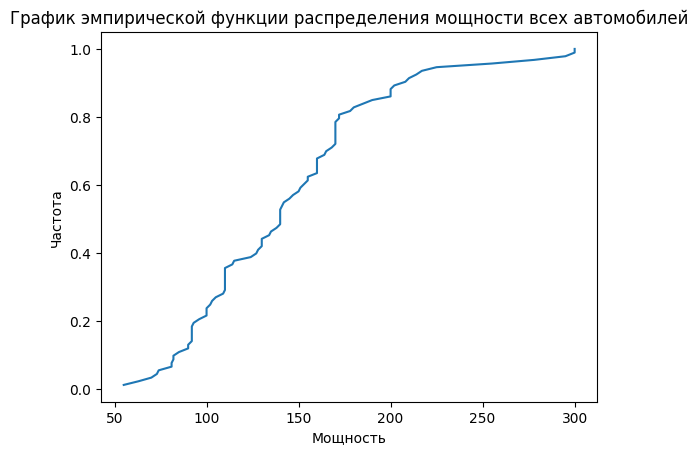

In [92]:
x = np.sort(df['Horsepower'].values)
y = np.arange(1, len(x)+1)/float(len(x))
plt.plot(x, y)
plt.title("График эмпирической функции распределения мощности всех автомобилей")
plt.xlabel("Мощность")
plt.ylabel("Частота")

Text(0, 0.5, 'Частота')

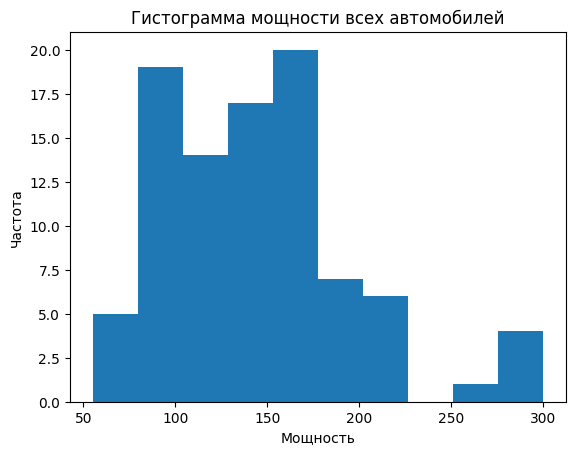

In [93]:
ax = df['Horsepower'].plot(kind="hist", title="Гистограмма мощности всех автомобилей")
ax.set_xlabel("Мощность")
ax.set_ylabel("Частота")

Text(0, 0.5, 'Мощность')

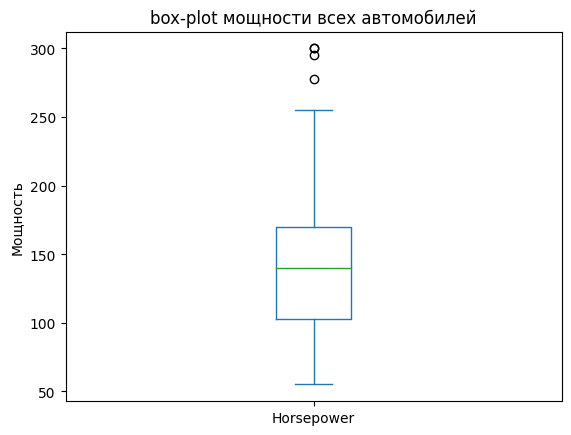

In [94]:
ax = df['Horsepower'].plot(kind="box", title="box-plot мощности всех автомобилей")
ax.set_ylabel("Мощность")

*б) для каждого типа автомобиля*

In [95]:
def plot(input):
    x = np.sort(input.values)
    y = np.arange(1, len(x)+1)/float(len(x))
    plt.plot(x, y)
    plt.title("График эмпирической функции распределения мощности автомобилей ")
    plt.xlabel("Мощность")
    plt.ylabel("Частота")

def barChar(input):
    ax = input.plot(kind="hist", title="Гистограмма мощности автомобилей ")
    ax.set_xlabel("Мощность")
    ax.set_ylabel("Частота")

def boxPlot(input):
    ax = input.plot(kind="box", title="Box-plot мощности автомобилей ")
    ax.set_ylabel("Мощность")

**Compact**


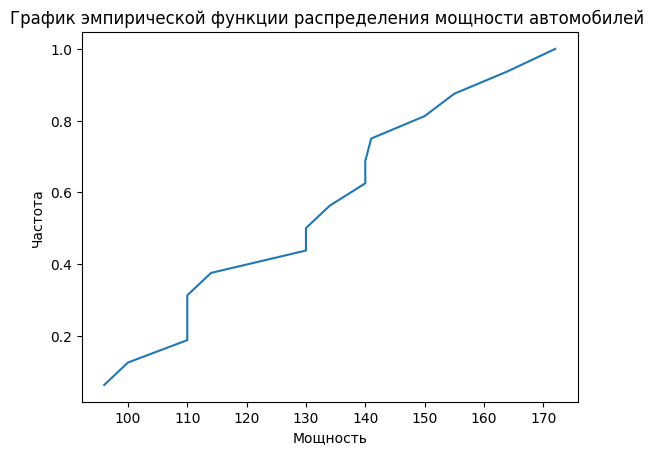

In [96]:
plot(df.loc[(df['Type'] == 'Compact'), 'Horsepower'])

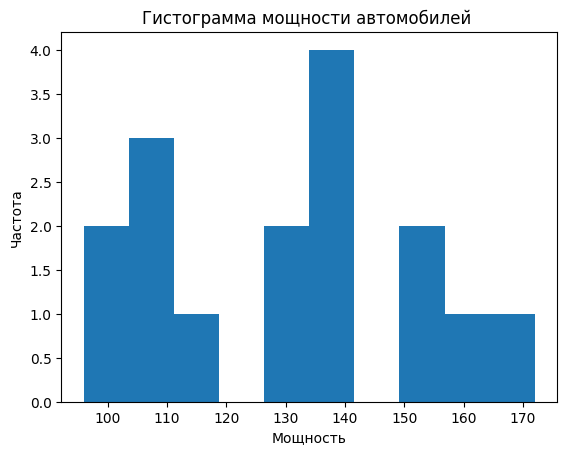

In [97]:
barChar(df.loc[(df['Type'] == 'Compact'), 'Horsepower'])

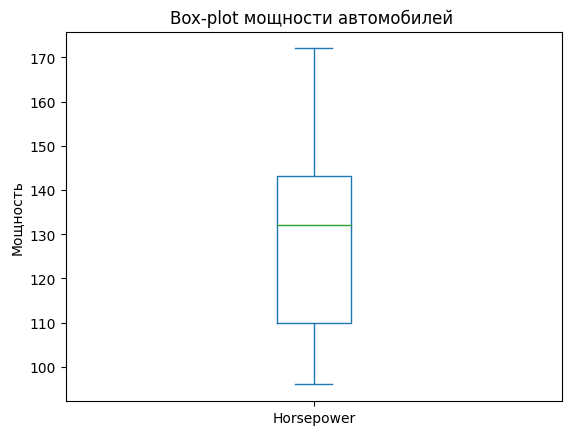

In [98]:

boxPlot(df.loc[(df['Type'] == 'Compact'), 'Horsepower'])

**Large**

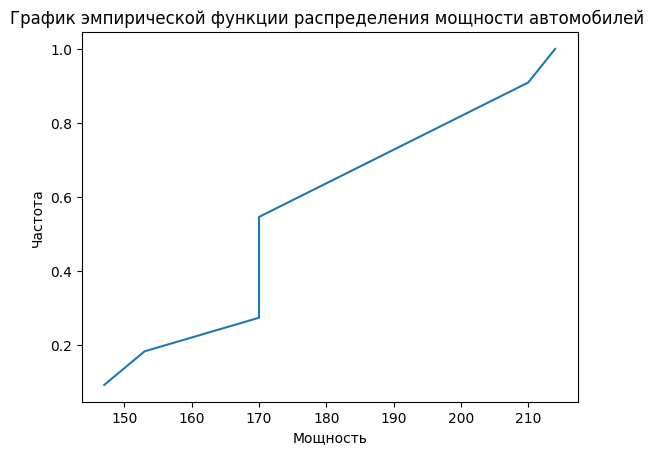

In [99]:
plot(df.loc[(df['Type'] == 'Large'), 'Horsepower'])


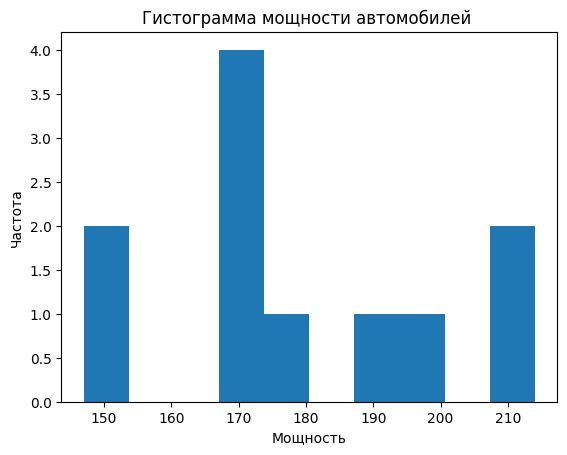

In [100]:
barChar(df.loc[(df['Type'] == 'Large'), 'Horsepower'])

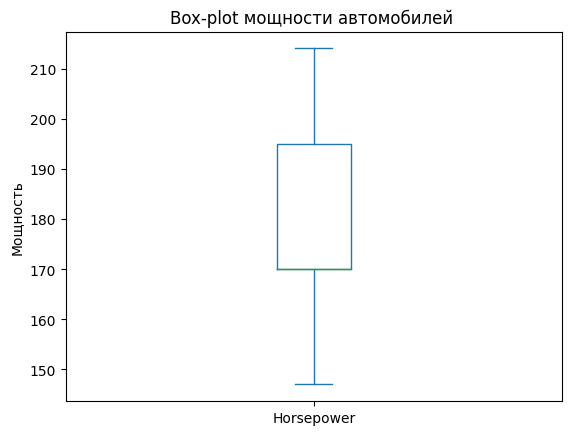

In [101]:

boxPlot(df.loc[(df['Type'] == 'Large'), 'Horsepower'])

**Midsize**

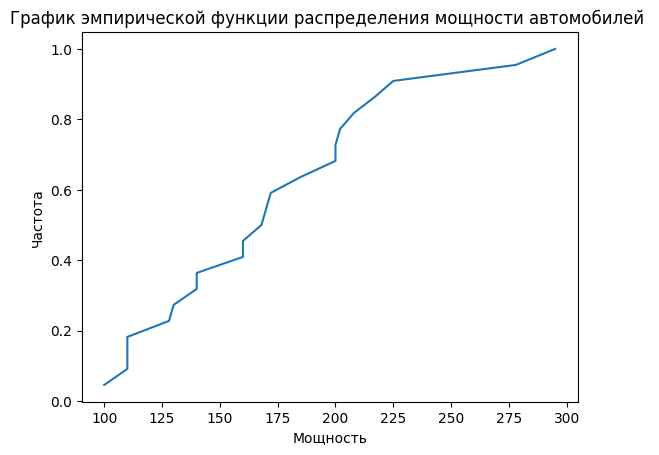

In [102]:
plot(df.loc[(df['Type'] == 'Midsize'), 'Horsepower'])

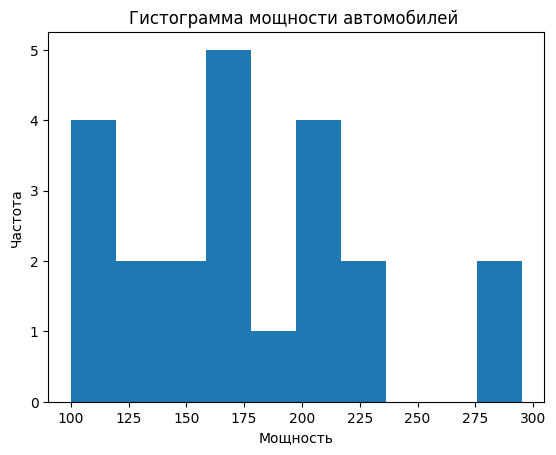

In [103]:
barChar(df.loc[(df['Type'] == 'Midsize'), 'Horsepower'])

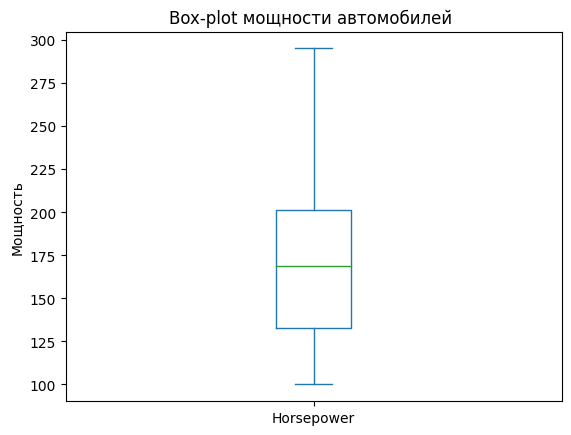

In [104]:
boxPlot(df.loc[(df['Type'] == 'Midsize'), 'Horsepower'])

**Small**

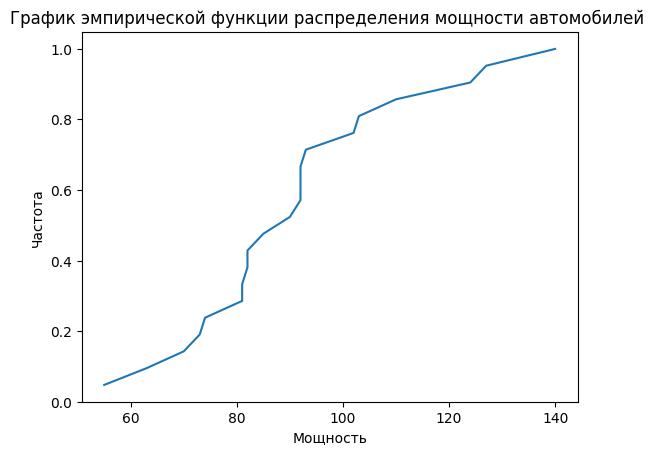

In [105]:
plot(df.loc[(df['Type'] == 'Small'), 'Horsepower'])

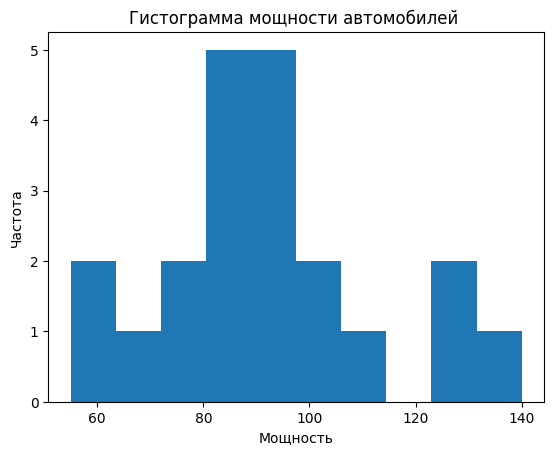

In [106]:
barChar(df.loc[(df['Type'] == 'Small'), 'Horsepower'])

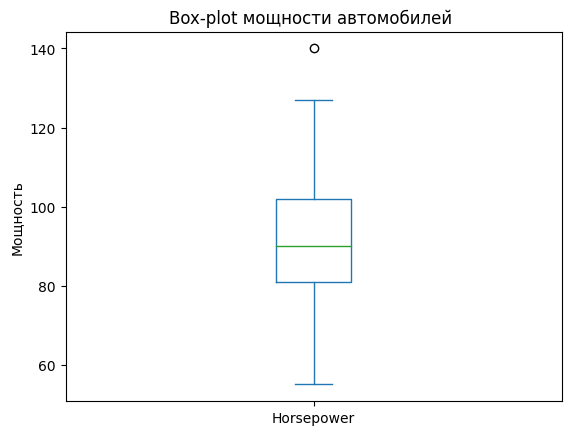

In [107]:
boxPlot(df.loc[(df['Type'] == 'Small'), 'Horsepower'])

**Sporty**

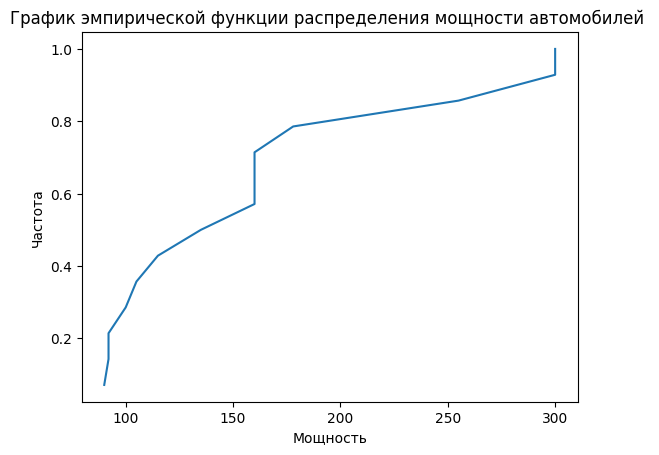

In [108]:
plot(df.loc[(df['Type'] == 'Sporty'), 'Horsepower'])

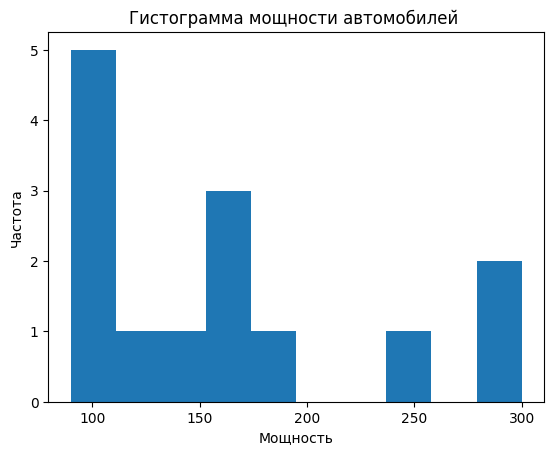

In [109]:
barChar(df.loc[(df['Type'] == 'Sporty'), 'Horsepower'])

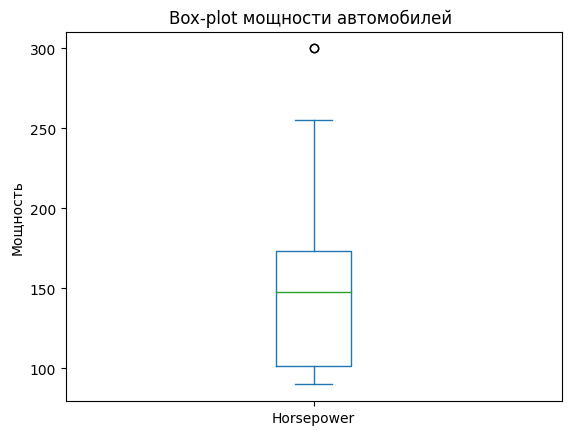

In [110]:
boxPlot(df.loc[(df['Type'] == 'Sporty'), 'Horsepower'])

**Van**

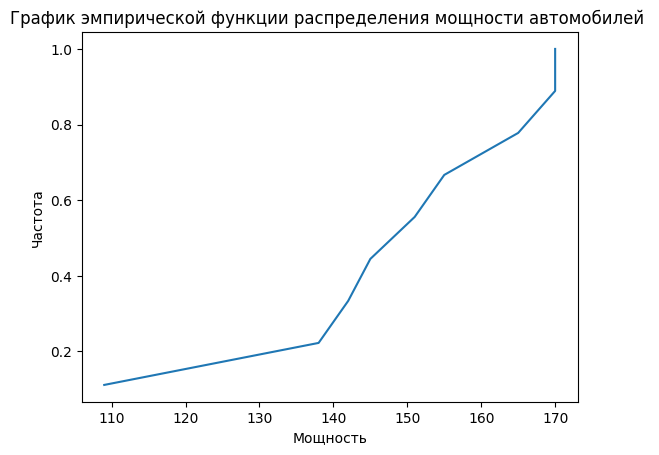

In [111]:
plot(df.loc[(df['Type'] == 'Van'), 'Horsepower'])

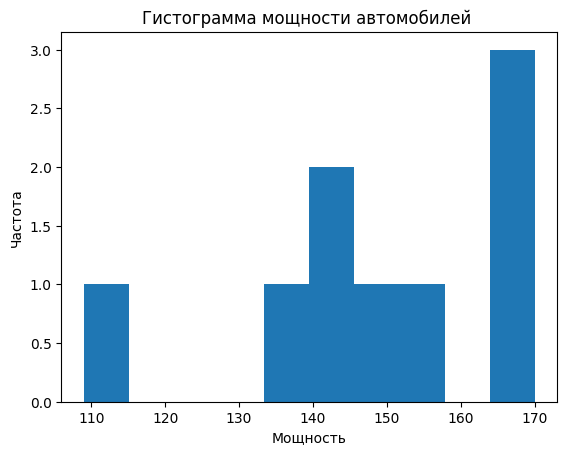

In [112]:
barChar(df.loc[(df['Type'] == 'Van'), 'Horsepower'])

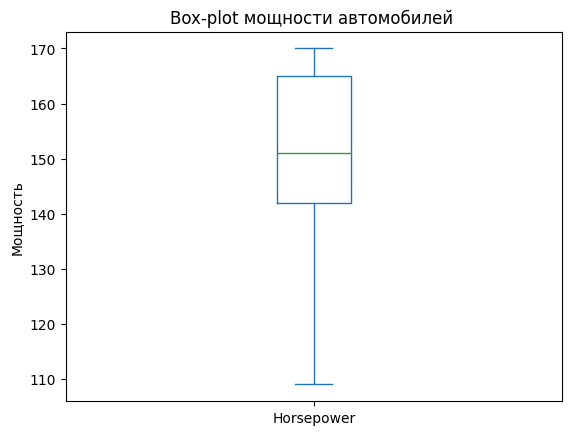

In [113]:
boxPlot(df.loc[(df['Type'] == 'Van'), 'Horsepower'])